<a href="https://colab.research.google.com/github/michellewg053/Predicting-students-exam-scores/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Students' Exam Scores

#### Data Pre-Processing & Preliminary Examination

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
url = '/content/drive/MyDrive/Colab Notebooks/Assesments/StudentPerformanceFactors.csv'
df = pd.read_csv(url)

In [ ]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# Drop rows with missing data
df = df.dropna()

In [ ]:
# Final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

## Exploratory Data Analysis

In [ ]:
# Display first few rows of the dataset
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


#### Descriptive Statistics

In [ ]:
# Mean exam score
df['Exam_Score'].mean()

67.25211665098777

In [ ]:
# Median exam score
df['Exam_Score'].median()

67.0

In [ ]:
# Minimum exam score
df['Exam_Score'].min()

55

In [ ]:
# Maximum exam score
df['Exam_Score'].max()

101

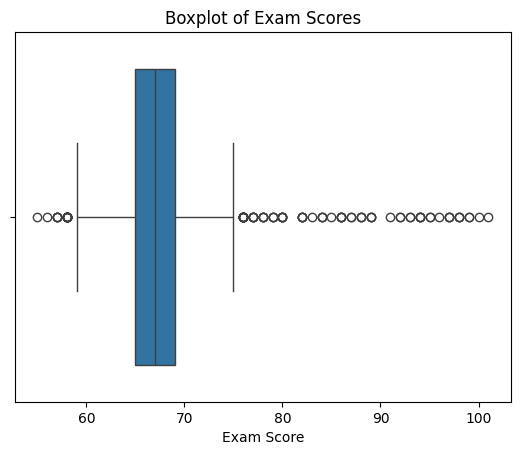

In [ ]:
# Boxplot of exam scores
sns.boxplot(data = df, x = 'Exam_Score')
plt.title('Boxplot of Exam Scores')
plt.xlabel('Exam Score')
plt.savefig('Boxplot of Exam Scores.png')

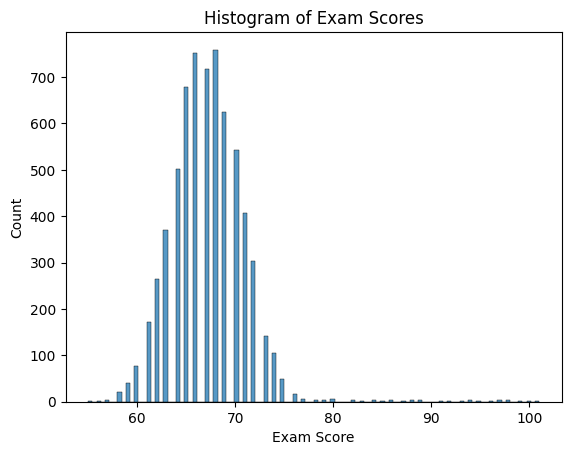

In [ ]:
# Histogram of exam scores
sns.histplot(data = df, x = 'Exam_Score')
plt.title('Histogram of Exam Scores')
plt.xlabel('Exam Score')
plt.savefig('Histogram of Exam Scores.png')

#### Initial Visualizations

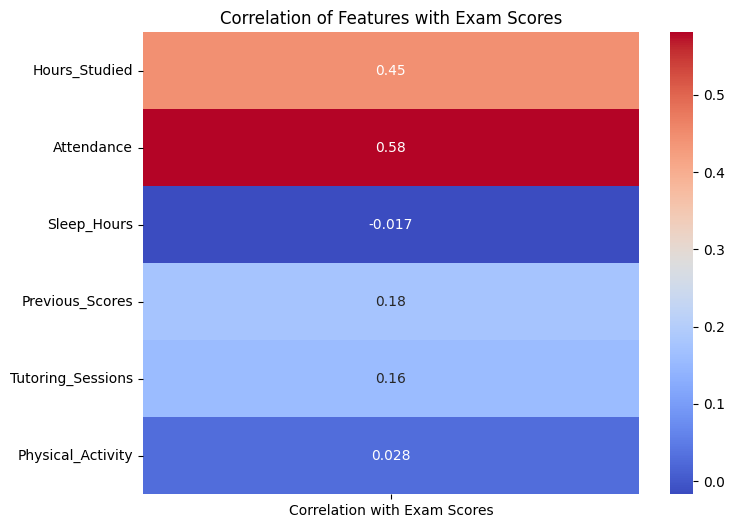

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Extract correlations with exam scores
target_corr = correlation_matrix['Exam_Score'].drop('Exam_Score')

# Convert to DataFrame
target_corr_df = target_corr.to_frame(name='Correlation with Exam Scores')

# Plot the heatmap showing correlations between numerical features and exam scores
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Exam Scores')
plt.show()

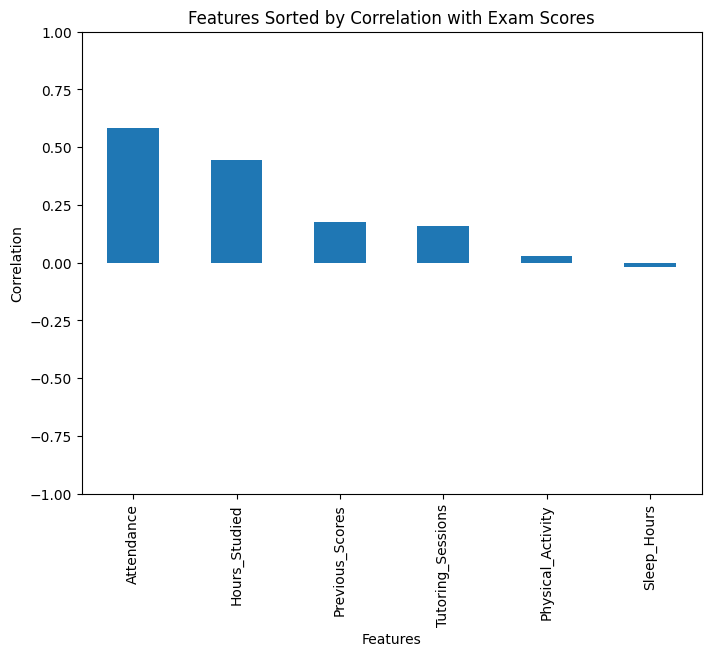

<Figure size 640x480 with 0 Axes>

In [ ]:
# Sort correlations in descending order
sorted_corr = target_corr.sort_values(ascending=False)

# Plot the sorted correlations
plt.figure(figsize=(8, 6))
sorted_corr.plot(kind='bar')
plt.title('Features Sorted by Correlation with Exam Scores')
plt.xlabel('Features')
plt.ylim(-1, 1)
plt.ylabel('Correlation')
plt.show()
plt.savefig('Features Sorted by Correlation with Exam Scores.png')

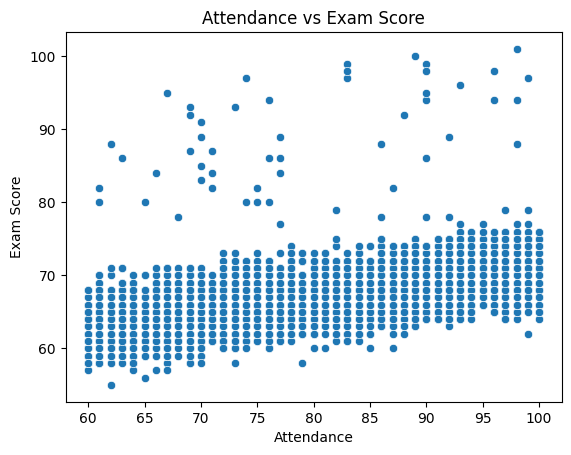

In [ ]:
# Plot attendance against exam score
sns.scatterplot(data = df, x = 'Attendance', y = 'Exam_Score')
plt.title('Attendance vs Exam Score')
plt.ylabel('Exam Score')
plt.savefig('Attendance vs Exam Score.png')

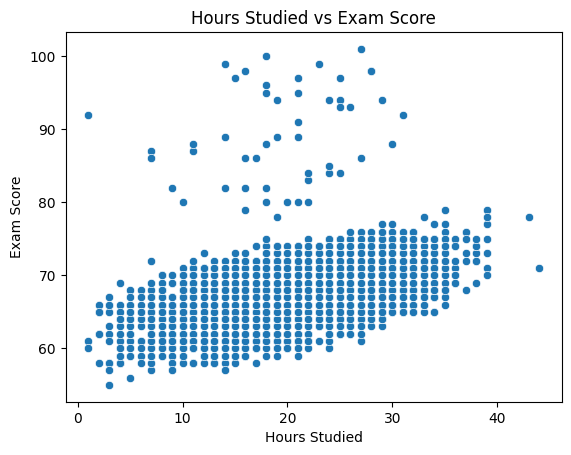

In [ ]:
# Plot hours studied against exam score
sns.scatterplot(data = df, x = 'Hours_Studied', y = 'Exam_Score')
plt.title('Hours Studied vs Exam Score')
plt.ylabel('Exam Score')
plt.xlabel('Hours Studied')
plt.savefig('Hours Studied vs Exam Score.png')

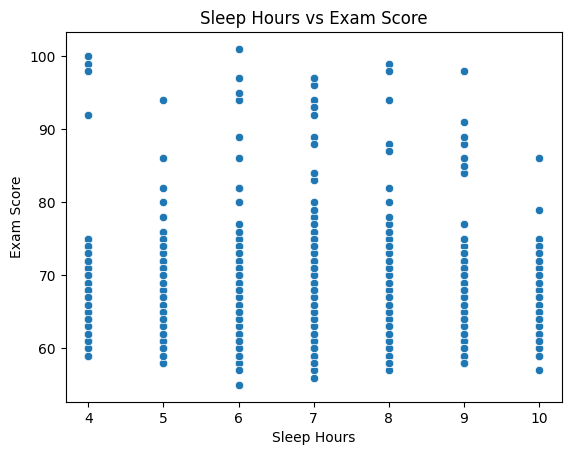

In [ ]:
# Plot sleep hours against exam score
sns.scatterplot(data = df, x = 'Sleep_Hours', y = 'Exam_Score')
plt.title('Sleep Hours vs Exam Score')
plt.ylabel('Exam Score')
plt.xlabel('Sleep Hours')
plt.savefig('Sleep Hours vs Exam Score.png')

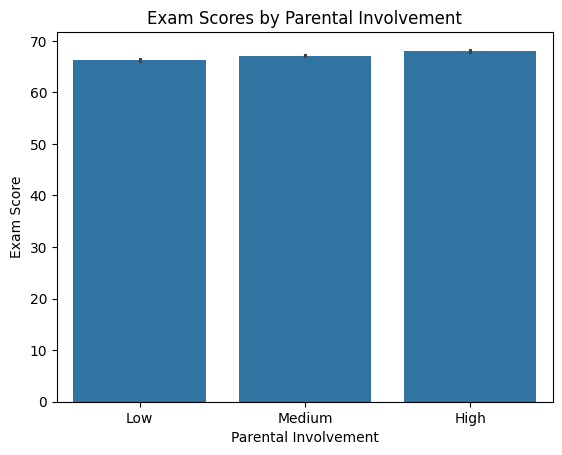

In [ ]:
# Plot parental involvement against exam score
sns.barplot(data = df, x = 'Parental_Involvement', y = 'Exam_Score')
plt.title('Exam Scores by Parental Involvement')
plt.ylabel('Exam Score')
plt.xlabel('Parental Involvement')
plt.savefig('Exam Scores by Parental Involvement.png')

Text(0.5, 0, 'Access to Resources')

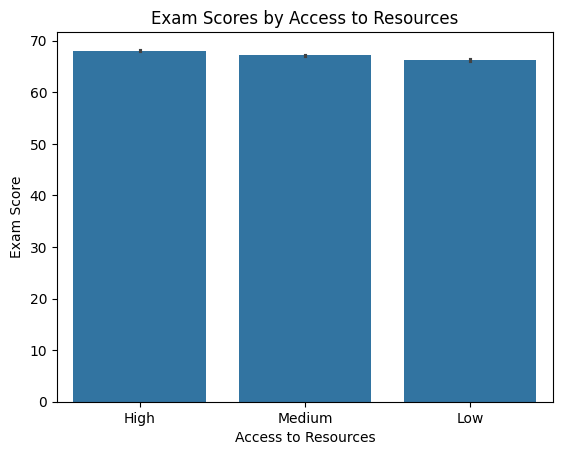

In [ ]:
# Plot access to resources against exam score
sns.barplot(data = df, x = 'Access_to_Resources', y = 'Exam_Score')
plt.title('Exam Scores by Access to Resources')
plt.ylabel('Exam Score')
plt.xlabel('Access to Resources')

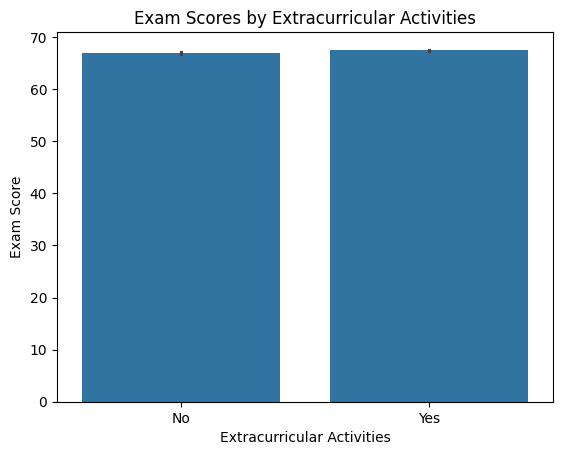

In [ ]:
# Plot extracurricular activities against exam score
sns.barplot(data = df, x = 'Extracurricular_Activities', y = 'Exam_Score')
plt.title('Exam Scores by Extracurricular Activities')
plt.ylabel('Exam Score')
plt.xlabel('Extracurricular Activities')
plt.savefig('Exam Scores by Extracurricular Activities.png')

#### Feature Engineering

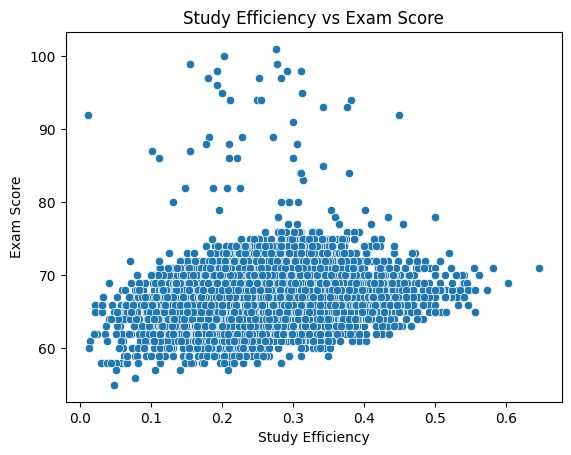

In [ ]:
# Study Efficiency (Hours Studied relative to Attendance)
df['Study_Efficiency'] = df['Hours_Studied'] / (df['Attendance'] + 1e-5)  # Avoid division by zero by using a small constant

# Plot study efficiency against exam score
sns.scatterplot(data = df, x = 'Study_Efficiency', y = 'Exam_Score')
plt.title('Study Efficiency vs Exam Score')
plt.ylabel('Exam Score')
plt.xlabel('Study Efficiency')
plt.savefig('Study Efficiency vs Exam Score.png')

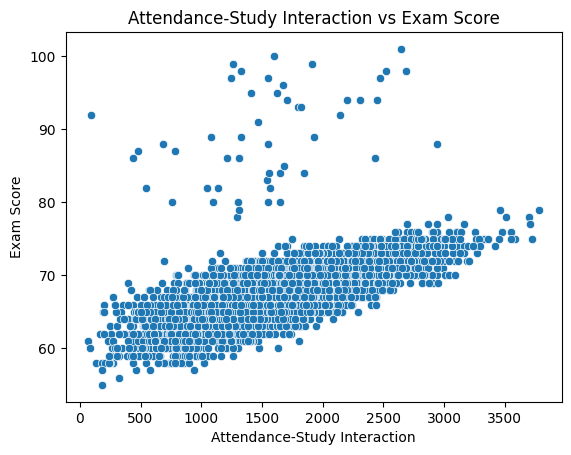

In [ ]:
# Attendance-Study Interaction (combined impact of Attendance and Hours Studied)
df['Attendance_Study_Interaction'] = df['Attendance'] * df['Hours_Studied']

# Plot attendance-study interaction against exam score
sns.scatterplot(data = df, x = 'Attendance_Study_Interaction', y = 'Exam_Score')
plt.title('Attendance-Study Interaction vs Exam Score')
plt.ylabel('Exam Score')
plt.xlabel('Attendance-Study Interaction')
plt.savefig('Attendance-Study Interaction vs Exam Score.png')

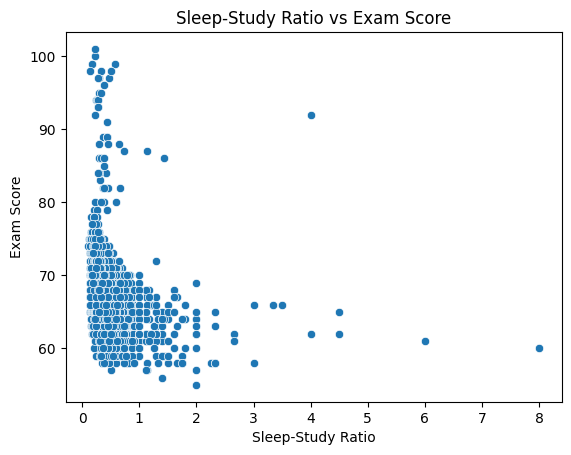

In [ ]:
# Sleep-Study Ratio (Ratio of Sleep Hours to Hours Studied)
df['Sleep_Study_Ratio'] = df['Sleep_Hours'] / (df['Hours_Studied'] + 1e-5)

# Plot sleep-study ratio against exam score
sns.scatterplot(data = df, x = 'Sleep_Study_Ratio', y = 'Exam_Score')
plt.title('Sleep-Study Ratio vs Exam Score')
plt.ylabel('Exam Score')
plt.xlabel('Sleep-Study Ratio')
plt.savefig('Sleep-Study Ratio vs Exam Score.png')

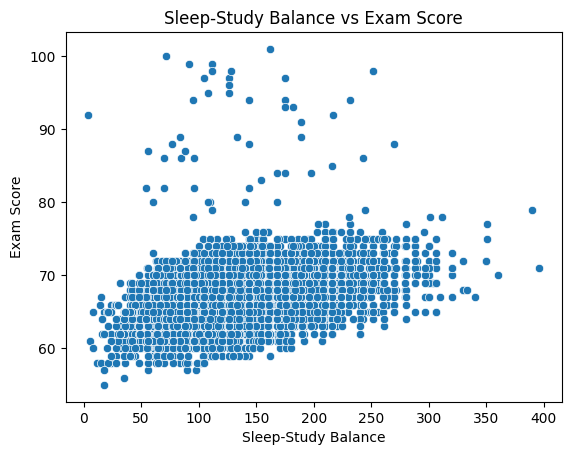

In [ ]:
# Sleep-Study Balance (combined effect of Sleep and Study Hours)
df['Sleep_Study_Balance'] = df['Sleep_Hours'] * df['Hours_Studied']

# Plot sleep-study balance against exam score
sns.scatterplot(data = df, x = 'Sleep_Study_Balance', y = 'Exam_Score')
plt.title('Sleep-Study Balance vs Exam Score')
plt.ylabel('Exam Score')
plt.xlabel('Sleep-Study Balance')
plt.savefig('Sleep-Study Balance vs Exam Score.png')

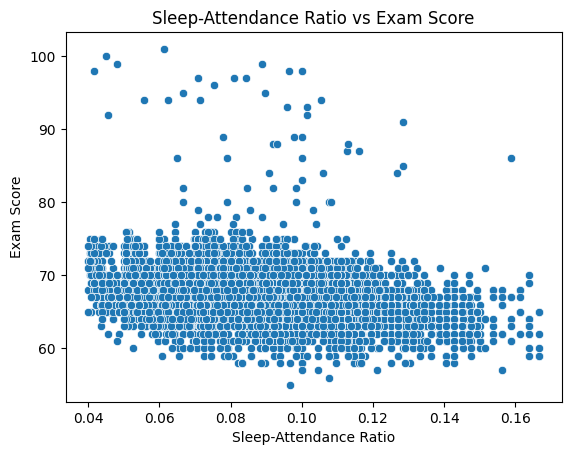

In [ ]:
# Sleep-Attendance Ratio (Ratio of Sleep Hours to Attendance Percentage)
df['Sleep_Attendance_Ratio'] = df['Sleep_Hours'] / (df['Attendance'] + 1e-5)

# Plot sleep-attendance ratio against exam score
sns.scatterplot(data = df, x = 'Sleep_Attendance_Ratio', y = 'Exam_Score')
plt.title('Sleep-Attendance Ratio vs Exam Score')
plt.ylabel('Exam Score')
plt.xlabel('Sleep-Attendance Ratio')
plt.savefig('Sleep-Attendance Ratio vs Exam Score.png')

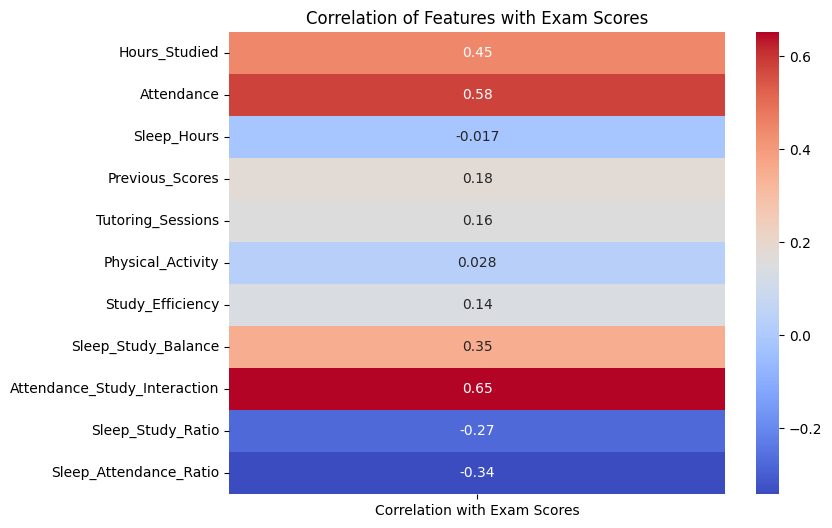

In [ ]:
# Look at correlations with new features

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Extract correlations with exam scores
target_corr = correlation_matrix['Exam_Score'].drop('Exam_Score')

# Convert to DataFrame
target_corr_df = target_corr.to_frame(name='Correlation with Exam Scores')

# Plot the heatmap showing correlations between numerical features and exam scores
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Exam Scores')
plt.show()

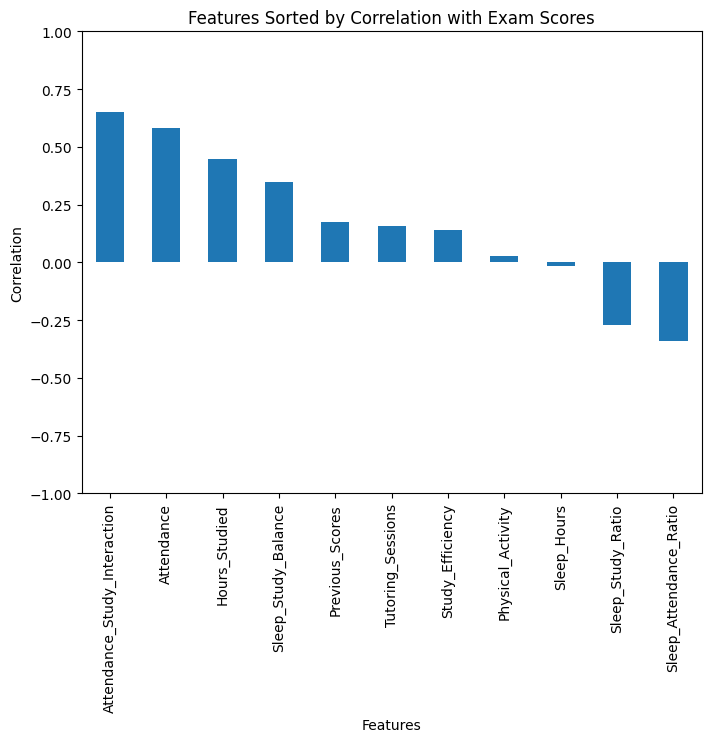

In [ ]:
# Sort correlations in descending order
sorted_corr = target_corr.sort_values(ascending=False)

# Plot the sorted correlations
plt.figure(figsize=(8, 6))
sorted_corr.plot(kind='bar')
plt.title('Features Sorted by Correlation with Exam Scores')
plt.xlabel('Features')
plt.ylim(-1, 1)
plt.ylabel('Correlation')
plt.show()

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

In [ ]:
# Set X and y
X = df.drop(columns=['Exam_Score', 'Physical_Activity', 'Sleep_Hours', 'Family_Income', 'Teacher_Quality',
                     'School_Type', 'Parental_Education_Level', 'Gender'])
y = df['Exam_Score']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

#### Baseline Model

In [ ]:
# Calculate the mean of the training target
baseline_mean = y_train.mean()

# Calculate the baseline MSE
baseline_mse = mean_squared_error(y_test, [baseline_mean] * len(y_test))
print(baseline_mse)

16.86140243868859


#### Multiple Regression Model

In [ ]:
# Encode categorical columns
cat_col = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
           'Internet_Access', 'Peer_Influence', 'Learning_Disabilities', 'Distance_from_Home']

# Scale data
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [ ]:
# Create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

In [ ]:
# Fit pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Motivation_Level',
                                                   'Internet_Access',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Distance_from_Home'])])),
                ('model', LinearRegression())])

In [ ]:
# Find coefficients
lr = pipe.named_steps['model']
coefficients = lr.coef_
feature_names = transformer.get_feature_names_out()
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
22,remainder__Sleep_Attendance_Ratio,5.638384
9,onehotencoder__Peer_Influence_Positive,1.080424
12,onehotencoder__Distance_from_Home_Near,0.993407
7,onehotencoder__Internet_Access_Yes,0.916675
4,onehotencoder__Extracurricular_Activities_Yes,0.554405
8,onehotencoder__Peer_Influence_Neutral,0.546735
17,remainder__Tutoring_Sessions,0.497845
13,onehotencoder__Distance_from_Home_nan,0.496150
11,onehotencoder__Distance_from_Home_Moderate,0.475856
14,remainder__Hours_Studied,0.295450


In [ ]:
# Find y-int
lr.intercept_

41.97631136469539

In [ ]:
# Calculate mse for training data
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

4.3361589711486985

In [ ]:
# Calculate mse for testing data
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

5.44052698131515

In [ ]:
# Determine feature importance
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10, random_state = 19)
perm_importance_df = pd.DataFrame(r['importances_mean'], index=X_test.columns, columns=['Importance'])
perm_importance_df.sort_values(by='Importance', ascending=False)

,Importance
Attendance,0.574418
Hours_Studied,0.380330
Access_to_Resources,0.065217
Previous_Scores,0.057963
Parental_Involvement,0.057256
Tutoring_Sessions,0.044094
Attendance_Study_Interaction,0.014742
Motivation_Level,0.014543
Peer_Influence,0.014460
Distance_from_Home,0.011349


#### K-Nearest Neighbors Regression Model

In [ ]:
# Scale data
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = StandardScaler())

In [ ]:
# Create pipeline for knn regression model
pipe = Pipeline([('encode', transformer), ('model', KNeighborsRegressor())])

In [ ]:
# Define grid of hyperparameters for number of neighbors
param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]}

In [ ]:
# Perform grid-search with cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Parental_Involvement',
                                                                          'Access_to_Resources',
                                                                          'Extracurricular_Activities',
                                                                          'Motivation_Level',
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities',
                                                                          'Distance_from_Home'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
# Determine best parameter
grid_search.best_params_

{'model__n_neighbors': 25}

In [ ]:
# Use 25 neighbors in model
knn = grid_search.best_estimator_

In [ ]:
# Calculate mse for training data
y_train_preds = knn.predict(X_train)
mean_squared_error(y_train, y_train_preds)

5.365953453169347

In [ ]:
# Calculate mse for testing data
y_test_preds = knn.predict(X_test)
mean_squared_error(y_test, y_test_preds)

7.2013361573373675

In [ ]:
# Determine feature importance
r = permutation_importance(knn, X_test, y_test, n_repeats = 10, random_state = 19)
perm_importance_df = pd.DataFrame(r['importances_mean'], index=X_test.columns, columns=['Importance'])
perm_importance_df.sort_values(by='Importance', ascending=False)

,Importance
Attendance,0.244602
Attendance_Study_Interaction,0.121464
Previous_Scores,0.043456
Sleep_Attendance_Ratio,0.030985
Sleep_Study_Balance,0.029741
Hours_Studied,0.028947
Tutoring_Sessions,0.028543
Access_to_Resources,0.017195
Parental_Involvement,0.012256
Distance_from_Home,0.006820


#### Random Forest Regression Model

In [ ]:
# Scale data
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [ ]:
# Create pipeline for random forest regression model
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])

In [ ]:
# Define grid of hyperparameters for number of estimators and max depth
param_grid = {'model__n_estimators': [50, 100, 150, 200],'model__max_depth': [3, 4, 5, 6, 10]}

In [ ]:
# Perform grid-search with cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Parental_Involvement',
                                                                          'Access_to_Resources',
                                                                          'Extracurricular_Activities',
                                                                          'Motivation_Level',
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities',
                                                                          'Distance_from_Home'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Determine best parameters
grid_search.best_params_

{'model__max_depth': 10, 'model__n_estimators': 200}

In [ ]:
# Use max depth of 10 and 200 estimators in model
forest = grid_search.best_estimator_

In [ ]:
# Calculate mse for training data
y_train_preds = forest.predict(X_train)
mean_squared_error(y_train, y_train_preds)

1.624271209829426

In [ ]:
# Calculate mse for testing data
y_test_preds = forest.predict(X_test)
mean_squared_error(y_test, y_test_preds)

7.207946518028344

In [ ]:
# Determine feature importance
r = permutation_importance(forest, X_test, y_test, n_repeats = 10, random_state = 19)
perm_importance_df = pd.DataFrame(r['importances_mean'], index=X_test.columns, columns=['Importance'])
perm_importance_df.sort_values(by='Importance', ascending=False)

,Importance
Attendance_Study_Interaction,0.551452
Attendance,0.300592
Previous_Scores,0.040529
Parental_Involvement,0.025844
Access_to_Resources,0.023003
Tutoring_Sessions,0.021945
Study_Efficiency,0.018413
Sleep_Study_Balance,0.007683
Peer_Influence,0.004298
Motivation_Level,0.001968


#### Lasso Regression

In [ ]:
# Numerical columns
num_col = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Study_Efficiency',
           'Attendance_Study_Interaction', 'Sleep_Study_Ratio', 'Sleep_Study_Balance', 'Sleep_Attendance_Ratio']

# Scale data
transformer = make_column_transformer((OneHotEncoder(drop='first', sparse_output=False), cat_col),
                                      (StandardScaler(), num_col), remainder='passthrough')

In [ ]:
# Create pipeline for lasso regression model
pipe = Pipeline([('preprocessor', transformer), ('model', Lasso(max_iter=10000))])

In [ ]:
# Define grid of hyperparameters for alpha (regularization strength)
param_grid = {'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
# Perform grid-search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Parental_Involvement',
                                                                          'Access_to_Resources',
                                                                          'Extracurricular_Activities',
                                                                          'Motivation_Level',
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities',
                                                                          'Distance_from_Home']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Hours_Studied',
                                                                          'Attendance',
                                                                          'Previous_Scores',
                                                                          'Tutoring_Sessions',
                                                                          'Study_Efficiency',
                                                                          'Attendance_Study_Interaction',
                                                                          'Sleep_Study_Ratio',
                                                                          'Sleep_Study_Balance',
                                                                          'Sleep_Attendance_Ratio'])])),
                                       ('model', Lasso(max_iter=10000))]),
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Determine best parameters
grid_search.best_params_['model__alpha']

0.001

In [ ]:
# Use alpha of 0.001 in model
lasso_best = grid_search.best_estimator_

In [ ]:
# Calculate MSE for training data
y_train_preds = lasso_best.predict(X_train)
mean_squared_error(y_train, y_train_preds)

4.3368545761966235

In [ ]:
# Calculate MSE for testing data
y_test_preds = lasso_best.predict(X_test)
mean_squared_error(y_test, y_test_preds)

5.431426060177328

In [ ]:
# Extract feature importance from Lasso coefficients
best_lasso = grid_search.best_estimator_
lasso_coefficients = lasso_best.named_steps['model'].coef_
feature_names = best_lasso.named_steps['preprocessor'].get_feature_names_out()
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})
coef_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
15,standardscaler__Attendance,2.054467
14,standardscaler__Hours_Studied,1.276330
9,onehotencoder__Peer_Influence_Positive,1.067613
12,onehotencoder__Distance_from_Home_Near,0.960328
7,onehotencoder__Internet_Access_Yes,0.901976
16,standardscaler__Previous_Scores,0.679880
17,standardscaler__Tutoring_Sessions,0.615010
19,standardscaler__Attendance_Study_Interaction,0.567145
4,onehotencoder__Extracurricular_Activities_Yes,0.550017
8,onehotencoder__Peer_Influence_Neutral,0.533374


In [ ]:
# Determine feature importance from permutation importance
r = permutation_importance(lasso_best, X_test, y_test, n_repeats=10, random_state=19)
perm_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': r['importances_mean']})
perm_importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,Attendance,0.550254
0,Hours_Studied,0.199773
3,Access_to_Resources,0.064792
5,Previous_Scores,0.057871
2,Parental_Involvement,0.056992
8,Tutoring_Sessions,0.043980
13,Attendance_Study_Interaction,0.042582
6,Motivation_Level,0.014381
9,Peer_Influence,0.014310
11,Distance_from_Home,0.011254
